# Opis projektu
Temat: Analiza danych NTM w odniesieniu do czynników kulturowo - politycznych z wykorzystaniem technik ekspoloracyjnej analizy danych.

Imię: Kacper

Nazwisko: Jarosik

Indeks: 245826

Przedmiot: Eksploracyjna analiza danych

# Ogólny Opis Danych

- ### Dane exel 2019-2023
    - Nietrzymanie moczu - zestawienie 2019-2020.xlsb
    - Nietrzymanie moczu - zestawienie 2020-2021.xlsx
    - Nietrzymanie moczu - zestawienie 2022.xlsb
    - Nietrzymanie moczu - zestawienie 2023.xlsb

Powyższe dane o NTM są w oryginalnej formie i pochodzą z: https://dane.gov.pl/pl/dataset/4312,leczenie-nietrzymania-moczu

- ### dane zgrupowane

Folder ten zawiera dane gov o NTM samodzielnie zgrupowane pod względem kategorii na przestrzeni lat 2019 - 2023, aby ułatwić porównywanie danych

- ### Dane wybory 2019-2023
    - Wybory do Parlamentu Europejskiego 2019.xlsx
    - Wybory do Sejmu i Senatu Rzeczypospolitej Polskiej 2019 i 2023.xlsx
    - Wybory Prezydenta Rzeczypospolitej Polskiej 2020.xlsx

Powyższe dane o wyborach są w oryginalnej formie i pochodzą z: https://bdl.stat.gov.pl/bdl/metadane/podgrupy/502

- ### Dane
    - Procentowe_wyniki_wyborów_do_Sejmu.png
    - cpi-grudzien.png

Zawiera wykres popracia partii politycznych w Polsce na przestrzeni lat. Źródło informacji: https://pl.wikipedia.org/wiki/Wybory_w_Polsce

Zawiera wykres inflacji w Polsce na przestrzeni lat. Źródło informacji: https://www.sii.org.pl/17851/analizy/newsroom/inflacja-w-polsce-ponizej-5-2025-r-pod-znakiem-polityki-i-rpp.html

## 1) Frekwencja w wyborach a diagnozy NTM

Dla wyborów do sejmu i senatu frekwencja różniła się o kilka setnych % i w celu zwiększenia czytelnośći została wybrana większa wartość. Pozostałe wybory mają wartości identyczne jak w oryginalnych danych.

Jako główny punkt odniesienia zakresu występowania NTM została wybrana liczba porad powiązanych z diagnozą NTM (dane są tylko z zakresu lat 2019 - 2023, dlatego też lata w, których odbyły się wybory zostały zawężone do tego zakresu).

Liczba porad powiązanych z diagnozą NTM to suma liczb dla poardni położniczo-ginekologicznej i urologicznej w danym roku.

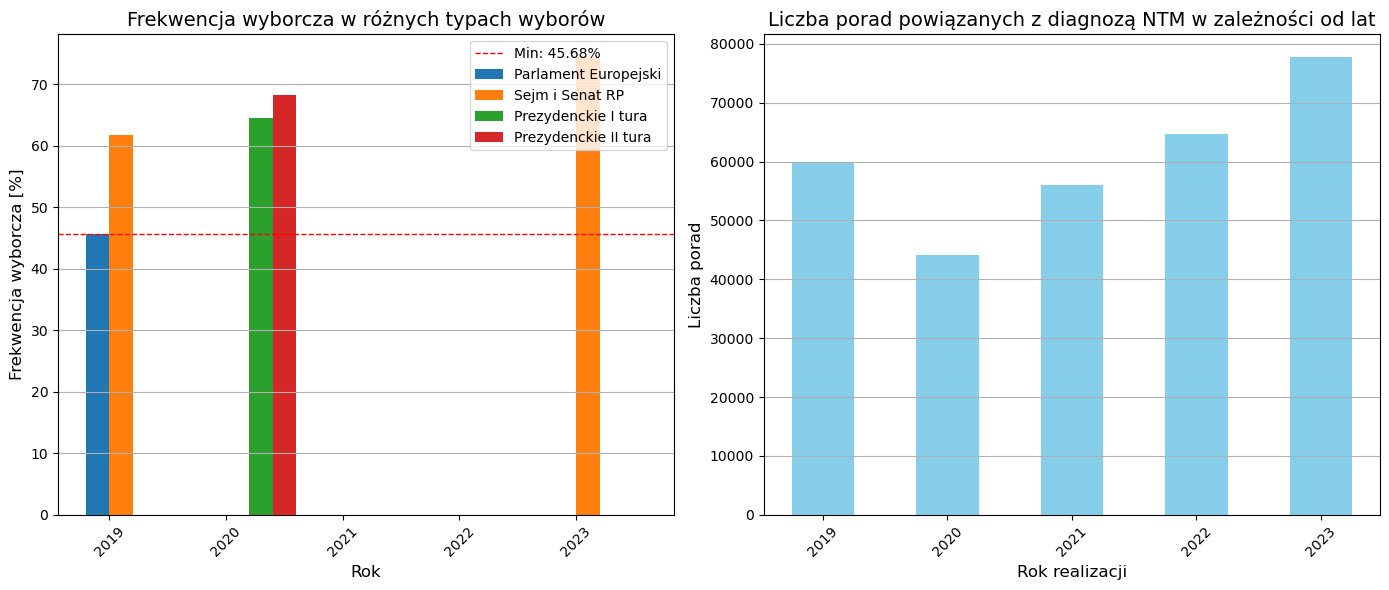

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dane frekwencji wyborczej
lata = [2019, 2020, 2021, 2022, 2023]
wybory = {
    "Parlament Europejski": [45.68, None, None, None, None],
    "Sejm i Senat RP": [61.74, None, None, None, 74.38],
    "Prezydenckie I tura": [None, 64.51, None, None, None],
    "Prezydenckie II tura": [None, 68.18, None, None, None]
}

# Przygotowanie danych do wykresu
x = np.arange(len(lata))  # Indeksy dla osi X
width = 0.2  # Szerokość słupków

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pierwszy wykres - frekwencja wyborcza
ax1 = axes[0]
all_values = [f for frekwencja in wybory.values() for f in frekwencja if f is not None]
min_value = min(all_values) if all_values else 0

for i, (typ, frekwencja) in enumerate(wybory.items()):
    values = [f if f is not None else 0 for f in frekwencja]
    ax1.bar(x + i * width, values, width=width, label=typ)

ax1.axhline(y=min_value, color='r', linestyle='--', linewidth=1, label=f'Min: {min_value:.2f}%')
ax1.set_xlabel("Rok", fontsize=12)
ax1.set_ylabel("Frekwencja wyborcza [%]", fontsize=12)
ax1.set_title("Frekwencja wyborcza w różnych typach wyborów", fontsize=14)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(lata, rotation=45)
ax1.legend()
ax1.grid(axis='y')

# Drugi wykres - liczba porad
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

lata_porad = sorted(df_porady_sum["rok realizacji"].unique())
x_porad = np.arange(len(lata_porad))
liczba_porad = df_porady_sum["liczba"].tolist()

ax2 = axes[1]
ax2.bar(x_porad, liczba_porad, width=0.5, color='skyblue', label="Porady")

ax2.set_xlabel("Rok realizacji", fontsize=12)
ax2.set_ylabel("Liczba porad", fontsize=12)
ax2.set_title("Liczba porad powiązanych z diagnozą NTM w zależności od lat", fontsize=14)
ax2.set_xticks(x_porad)
ax2.set_xticklabels(lata_porad, rotation=45)
ax2.grid(axis='y')

plt.tight_layout()
plt.show()


## 2) NTM a poparcie partii politycznych
**Wykres poparcia partii politycznych**

Procentowe wyniki wyborów do Sejmu, 1991-2023. Uwzględnione komitety z wynikiem powyżej 0,4%. ARS - Alternatywa Ruch Społeczny, AWS - Akcja Wyborcza Solidarność, AWSP - Akcja Wyborcza Solidarność Prawicy, BBWR - Bezpartyjny Blok Wspierania Reform, BdP - Blok dla Polski, BS - Bezpartyjni Samorządowcy, ChD - Chrześcijańska Demokracja, K'15 - Kukiz'15, KdR - Koalicja dla Rzeczypospolitej, KLD - Kongres Liberalno-Demokratyczny, KNP - Kongres Nowej Prawicy, KO - Koalicja Obywatelska, K - Konfederacja Wolność i Niepodległość, KORWiN - Koalicja Odnowy Rzeczypospolitej - Wolność i Nadzieja, KPEiR - Krajowa Partia Emerytów i Rencistów, KPEiR RP - Krajowe Porozumienie Emerytów i Rencistów RP, KPN - Konfederacja Polski Niepodległej, L - Lewica, LiD - Lewica i Demokraci, LPR - Liga Polskich Rodzin, MN - Mniejszość Niemiecka, .N - .Nowoczesna, NSZZ S - NSZZ Solidarność, Ojczyzna, PC - Porozumienie Centrum, PChD - Partia Chrześcijańskich Demokratów, PD - Partia Demokratyczna, PiS - Prawo i Sprawiedliwość, PJJ - Polska Jest Jedna, PJKM - Platforma Janusza Korwin-Mikke, PJN - Polska Jest Najważniejsza, PO - Platforma Obywatelska, POC - Porozumienie Obywatelskie Centrum, PPP - Polska Partia Pracy, PPPP - Polska Partia Przyjaciół Piwa, PSL - Polskie Stronnictwo Ludowe, PSL-PL - Polskie Stronnictwo Ludowe - Porozumienie Ludowe, Razem, RDS - Ruch Demokratyczno-Społeczny, ROP - Ruch Odbudowy Polski, RP - Ruch Palikota, RPat - Ruch Patriotyczny, SD - Stronnictwo Demokratyczne, SDPL - Socjaldemokracja Polska, SLD - Sojusz Lewicy Demokratycznej, SLD-UP - Sojusz Lewicy Demokratycznej - Unia Pracy, SO - Samoobrona, SP - Solidarność Pracy, TD - Trzecia Droga Polska 2050 Szymona Hołowni - Polskie Stronnictwo Ludowe, UD - Unia Demokratyczna, UP - Unia Pracy, UPR - Unia Polityki Realnej, UPRP - Unia Prawicy Rzeczypospolitej, UW - Unia Wolności, WAK - Wyborcza Akcja Katolicka, X - Partia X, ZL - Zjednoczona Lewica

Jako główny punkt odniesienia zakresu występowania NTM została wybrana liczba porad powiązanych z diagnozą NTM (dane są tylko z zakresu lat 2019 - 2023).

Liczba porad powiązanych z diagnozą NTM to suma liczb dla poardni położniczo-ginekologicznej i urologicznej w danym roku.



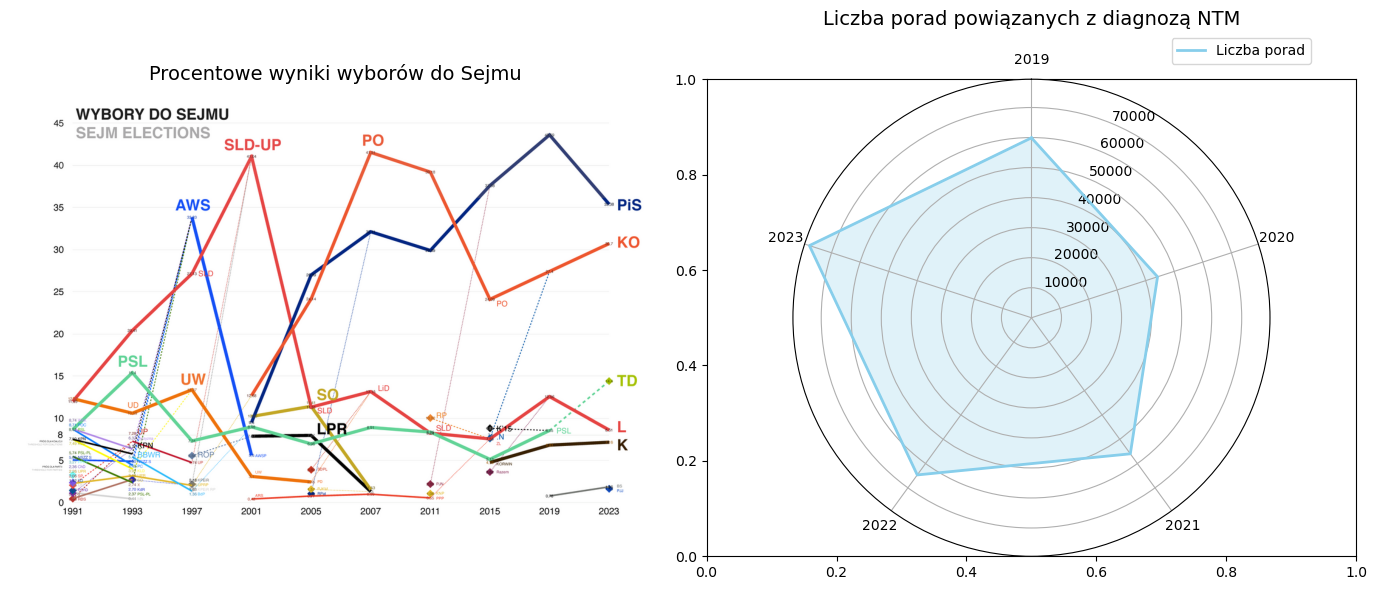

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import pi

# Wczytanie obrazu
image_path = "Dane/Procentowe_wyniki_wyborów_do_Sejmu.png"
img = mpimg.imread(image_path)

# Wczytanie danych z Excela
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

# Przygotowanie danych do wykresu radarowego
categories = df_porady_sum["rok realizacji"].astype(str).tolist()  # Lata jako kategorie
values = df_porady_sum["liczba"].tolist()  # Liczba porad
values += values[:1]  # Dodanie pierwszej wartości na koniec, by zamknąć wykres

# Obliczenie kątów dla osi
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Dodanie pierwszego kąta na koniec

# Tworzenie figure z dwoma subplotami obok siebie
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pierwszy subplot: Obraz
axes[0].imshow(img)
axes[0].axis("off")  # Ukrycie osi
axes[0].set_title("Procentowe wyniki wyborów do Sejmu", fontsize=14)

# Drugi subplot: Wykres radarowy
ax_radar = fig.add_subplot(1, 2, 2, polar=True)
ax_radar.set_theta_offset(pi / 2)
ax_radar.set_theta_direction(-1)

# Dodanie osi i danych
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories, fontsize=10)
ax_radar.plot(angles, values, linewidth=2, linestyle='solid', color='skyblue', label="Liczba porad")
ax_radar.fill(angles, values, color='skyblue', alpha=0.25)

# Dodanie tytułu i legendy
ax_radar.set_title("Liczba porad powiązanych z diagnozą NTM", fontsize=14, pad=20)
ax_radar.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))


# Dopasowanie układu
plt.tight_layout()
plt.show()


## 3)NTM a okres między 1 i 6 falą koronawirusa

Jako główny punkt odniesienia zakresu występowania NTM została wybrana liczba porad powiązanych z diagnozą NTM (dane są tylko z zakresu lat 2019 - 2023).

Liczba porad powiązanych z diagnozą NTM to suma liczb dla poardni położniczo-ginekologicznej i urologicznej w danym roku.

Informacje o falach koronawirusa pochodzą z: https://koronawirusunas.pl/

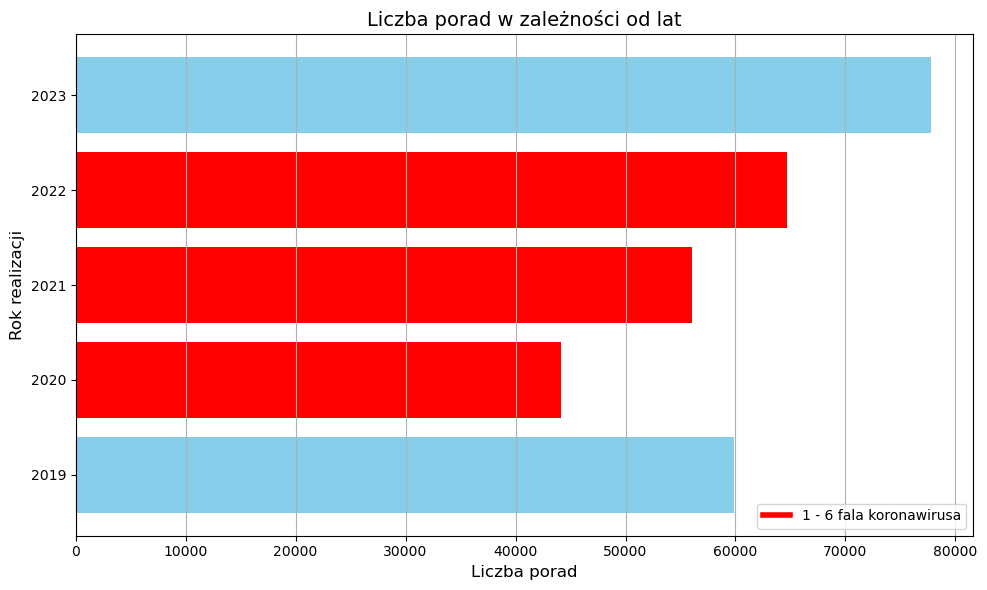

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Importowanie Line2D do niestandardowej legendy

# Wczytanie danych z Excela
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

# Przygotowanie danych do wykresu
lata_porad = sorted(df_porady_sum["rok realizacji"].unique())
liczba_porad = df_porady_sum["liczba"].tolist()

# Przygotowanie kolorów dla słupków
kolory = ['red' if rok in [2020, 2021, 2022] else 'skyblue' for rok in lata_porad]

# Tworzenie wykresu słupkowego poziomego
fig, ax = plt.subplots(figsize=(10, 6))

# Wykres słupkowy poziomy
bars = ax.barh(lata_porad, liczba_porad, color=kolory)
ax.set_xlabel("Liczba porad", fontsize=12)
ax.set_ylabel("Rok realizacji", fontsize=12)
ax.set_title("Liczba porad w zależności od lat", fontsize=14)
ax.grid(axis='x')

# Tworzenie niestandardowej legendy
legend_elements = [Line2D([0], [0], color='red', lw=4, label='1 - 6 fala koronawirusa')]
ax.legend(handles=legend_elements, loc="lower right")

# Dopasowanie układu
plt.tight_layout()
plt.show()


## 4) Rozkład diagnozy NTM na przestrzeni lat ze względu na płeć

Jako główny punkt odniesienia zakresu występowania NTM została wybrana liczba porad powiązanych z diagnozą NTM (dane są tylko z zakresu lat 2019 - 2023).

Liczba porad powiązanych z diagnozą NTM to suma liczb dla poardni położniczo-ginekologicznej (kobiety) i urologicznej (mężczyźni) w danym roku.

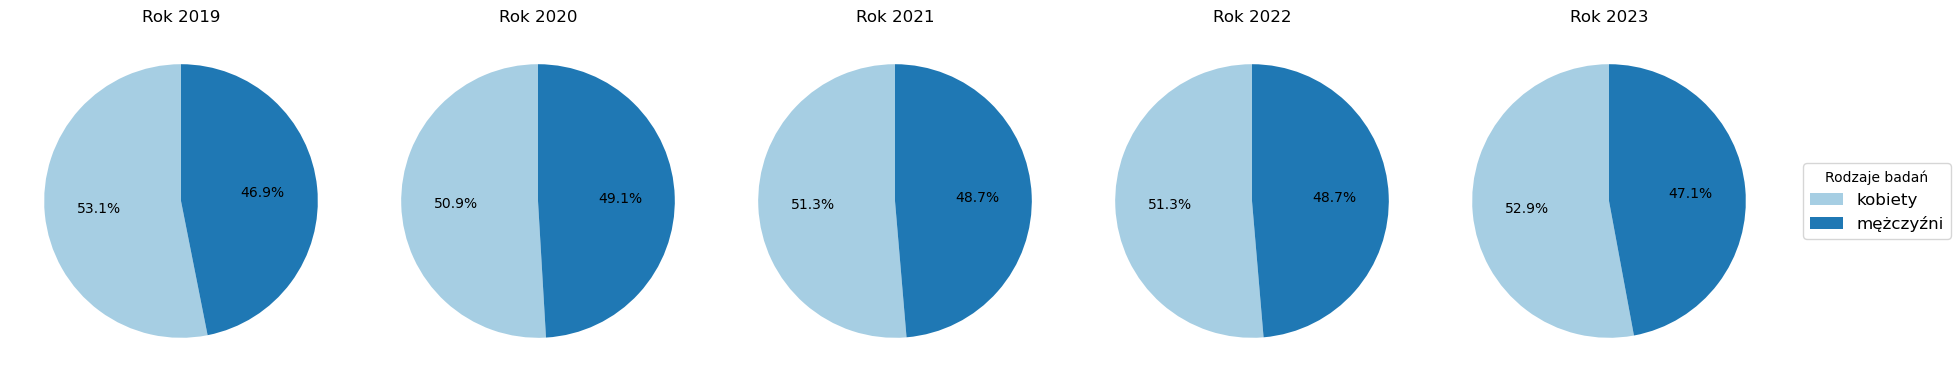

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane\\opieka ambulatoryjna\\porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Filtrowanie danych dla poradni "urologiczna" i "położniczo-ginekologiczna"
selected_poradnie = ["urologiczna", "położniczo-ginekologiczna"]
filtered_data = data[data["poradnia"].isin(selected_poradnie)]

# Ustawienia wykresów
years = [2019, 2020, 2021, 2022, 2023]
fig, axes = plt.subplots(1, len(years), figsize=(18, 6))  # 5 wykresów w jednym wierszu

# Lista do przechowywania legendy
handles, labels = [], []

# Zmiana nazw poradni na odpowiednie w legendzie
legend_labels = {
    "urologiczna": "mężczyźni",
    "położniczo-ginekologiczna": "kobiety"
}

# Tworzenie wykresów kołowych dla każdego roku
for i, year in enumerate(years):
    # Filtrowanie danych dla danego roku
    yearly_data = filtered_data[filtered_data["rok realizacji"] == year]

    # Obliczanie sumy liczby badań dla każdej poradni w danym roku
    yearly_counts = yearly_data.groupby("poradnia")["liczba"].sum()

    # Tworzenie wykresu kołowego z wyświetleniem tylko procentów
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        yearly_counts,
        autopct='%1.1f%%',  # Wyświetlanie tylko procentów
        startangle=90,
        colors=plt.cm.Paired.colors
    )

    # Podpisanie wykresu rokiem
    ax.set_title(f"Rok {year}", fontsize=12)

    # Dodanie elementów legendy (wykorzystamy pierwszy wykres, aby dodać legendę)
    if i == 0:  # Dodajemy legendę tylko do pierwszego wykresu
        for wedge, label in zip(wedges, yearly_counts.index):
            handles.append(wedge)
            # Zamiana nazw poradni na "mężczyźni" i "kobiety"
            labels.append(legend_labels[label])

# Dodanie wspólnej legendy
fig.legend(handles, labels, title="Rodzaje badań", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


## 5) Dofinansowania dla uprzywilejowanej grupy leków na NTM a wybuch wojny na Ukrainie
Wojna na ukrainie wybuchła na początku 2022, dlatego rok ten w większości był w czasie trwania wojny stąd przyjęta klasyfikacja

Porównywane są dane kosztów refundacji Solifenacyny i Tolterodyny tylko dla grup uprzywilejowanych, do których zaliczają się inwalidzi wojenni


Porównanie może być przekłamane przez zmianę uprzywilejowanej grupy (od 2022 do weteranów dołączyli seniorzy), dlatego dla lepszego porównania został pokazany obok 2. wykres pokazujący ilość opakowań refundowanych leków na przestrzeni lat

Grupa uprzywilejowana na przestrzeni lat:
- 2019: inwalida wojenny
- 2020: inwalida wojenny, żołnierz zasadniczej służby wojskowej, weteran z uszczerbkiem zdrowia powyżej 30%
- 2021: inwalida wojenny, żołnierz zasadniczej służby wojskowej, weteran z uszczerbkiem zdrowia powyżej 30%
- 2022: inwalida wojenny, żołnierz zasadniczej służby wojskowej, senior
- 2023: inwalida wojenny, żołnierz zasadniczej służby wojskowej, senior, weteran z uszczerbkiem zdrowia powyżej 30%


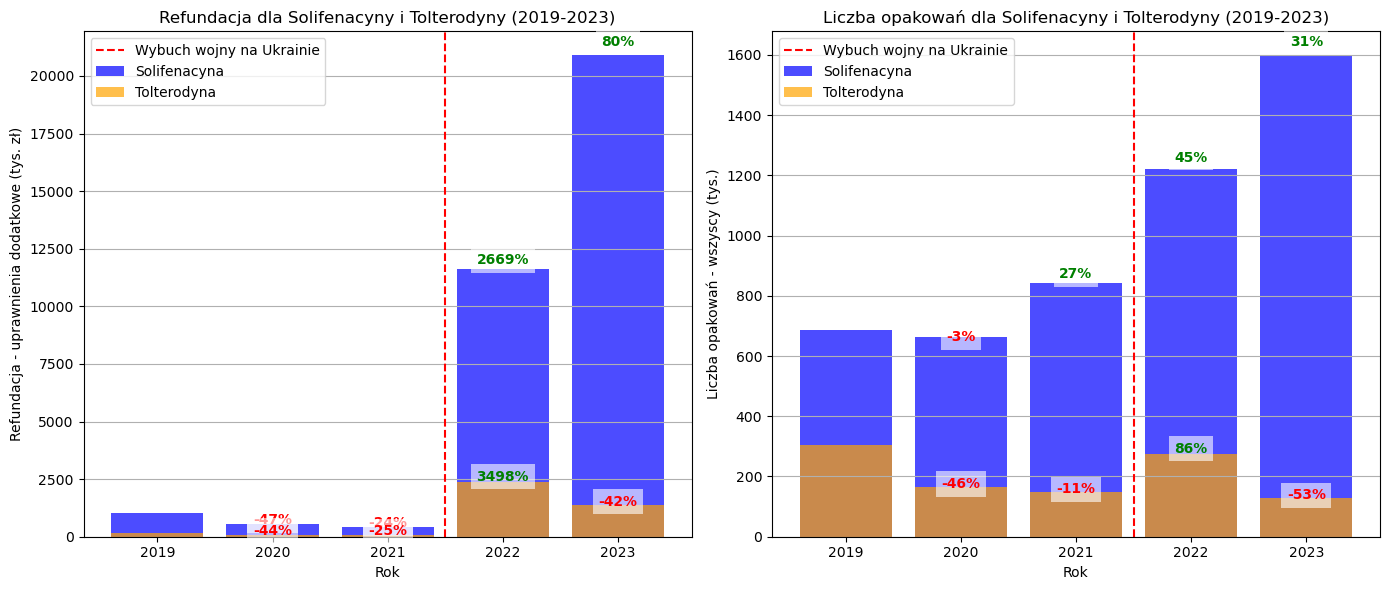

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane/LEKI_2019-2023.xlsx"  # Podmień na właściwą ścieżkę do pliku
df = pd.read_excel(file_path)

# Usunięcie białych znaków z nazw kolumn
df.columns = df.columns.str.strip()

# Filtrowanie danych dla Solifenacyny i Tolterodyny
df_filtered = df[df["Substancja czynna"].isin(["Solifenacyna", "Tolterodyna"])]

# Tworzenie dwóch wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

substances = ["Solifenacyna", "Tolterodyna"]
colors = ["blue", "orange"]

# Funkcja do obliczania i rysowania zmian procentowych
def annotate_percentage_change(ax, data, column):
    for i in range(1, len(data)):  # Start od drugiego roku
        prev_value = data.iloc[i - 1][column]
        curr_value = data.iloc[i][column]
        year = data.iloc[i]["ROK"]

        if prev_value > 0:  # Unikamy dzielenia przez zero
            change = ((curr_value - prev_value) / prev_value) * 100
            color = "green" if change > 0 else "red"

            # Ustalanie pozycji tekstu
            y_position = curr_value * 1.02 if change > 0 else curr_value * 0.98
            y_position = max(y_position, curr_value * 0.7)  # Nie pozwalamy spaść za nisko

            ax.text(year, y_position, f"{change:.0f}%",
                    ha='center', color=color, fontsize=10, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))  # Tło dla czytelności

# Pierwszy wykres - Refundacja
for substance, color in zip(substances, colors):
    subset = df_filtered[df_filtered["Substancja czynna"] == substance]
    axes[0].bar(subset["ROK"], subset["w tym refundacja - uprawnienia dodatkowe (tys. zł)"],
                label=substance, alpha=0.7, color=color)
    annotate_percentage_change(axes[0], subset, "w tym refundacja - uprawnienia dodatkowe (tys. zł)")

axes[0].axvline(x=2021.5, color='red', linestyle='--', label='Wybuch wojny na Ukrainie')
axes[0].set_xlabel("Rok")
axes[0].set_ylabel("Refundacja - uprawnienia dodatkowe (tys. zł)")
axes[0].set_title("Refundacja dla Solifenacyny i Tolterodyny (2019-2023)")
axes[0].legend()
axes[0].grid(axis='y')

# Drugi wykres - Liczba opakowań
for substance, color in zip(substances, colors):
    subset = df_filtered[df_filtered["Substancja czynna"] == substance]
    axes[1].bar(subset["ROK"], subset["liczba opakowań (tys.)"],
                label=substance, alpha=0.7, color=color)
    annotate_percentage_change(axes[1], subset, "liczba opakowań (tys.)")

axes[1].axvline(x=2021.5, color='red', linestyle='--', label='Wybuch wojny na Ukrainie')
axes[1].set_xlabel("Rok")
axes[1].set_ylabel("Liczba opakowań - wszyscy (tys.)")
axes[1].set_title("Liczba opakowań dla Solifenacyny i Tolterodyny (2019-2023)")
axes[1].legend()
axes[1].grid(axis='y')

# Dostosowanie układu
plt.tight_layout()
plt.show()


# 6) Inflacja w Polsce a wzrost cen badań związanych z wykrycien NTM

Dane inflacyjne zostały opracowane przez Stowarzyszenie Inwestorów Indywidualnych na podstawie danych GUS



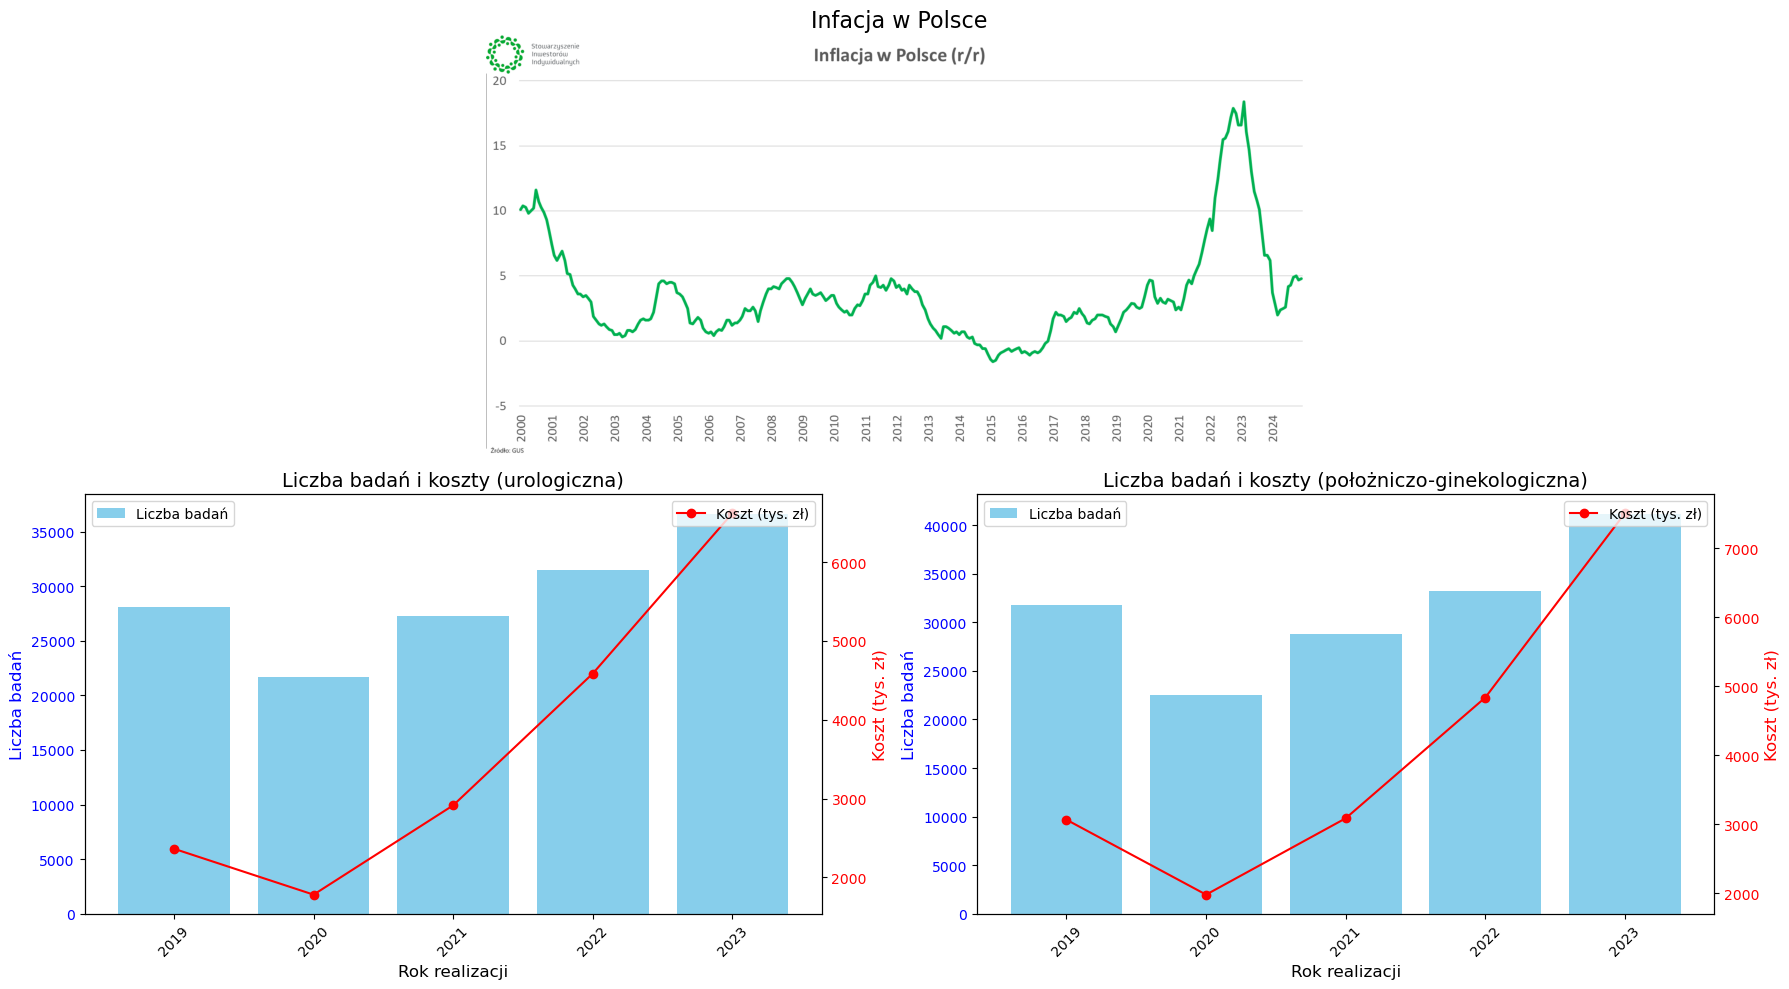

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane\\opieka ambulatoryjna\\porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Filtrowanie danych dla poradni "urologiczna" i "położniczo-ginekologiczna"
selected_poradnie = ["urologiczna", "położniczo-ginekologiczna"]
filtered_data = data[data["poradnia"].isin(selected_poradnie)]

image_path = "Dane/cpi-grudzien.png"

# Ustawienia siatki wykresów
fig = plt.figure(figsize=(18, 10))
grid = fig.add_gridspec(2, len(selected_poradnie), height_ratios=[1, 1])

# Wczytanie i wyświetlenie grafiki w górnym wierszu (obejmującym całą szerokość)
ax_image = fig.add_subplot(grid[0, :])  # Łączy wszystkie kolumny w pierwszym wierszu
image = imread(image_path)
ax_image.imshow(image)
ax_image.axis('off')
ax_image.set_title("Infacja w Polsce", fontsize=16)

# Tworzenie wykresów dla każdej poradni w dolnym wierszu siatki
for i, poradnia in enumerate(selected_poradnie):
    poradnia_data = filtered_data[filtered_data["poradnia"] == poradnia].sort_values(by="rok realizacji")

    # Dolne wykresy
    ax1 = fig.add_subplot(grid[1, i])
    ax1.bar(poradnia_data["rok realizacji"], poradnia_data["liczba"], color='skyblue', label="Liczba badań")
    ax1.set_xlabel("Rok realizacji", fontsize=12)
    ax1.set_ylabel("Liczba badań", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(poradnia_data["rok realizacji"])
    ax1.set_xticklabels(poradnia_data["rok realizacji"].astype(int), rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(poradnia_data["rok realizacji"], poradnia_data["koszt (tys. zł)"], color='red', marker='o', label="Koszt (tys. zł)", linestyle='-')
    ax2.set_ylabel("Koszt (tys. zł)", color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.set_title(f"Liczba badań i koszty ({poradnia})", fontsize=14)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

# Dopasowanie układu
plt.tight_layout()
plt.show()
